In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from google.colab import files

In [ ]:
# load data
X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

In [ ]:
permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [ ]:
##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1', markersize=2)
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2', markersize=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y, filename=None):
    xx, yy = plot_data_internal(X, y)
    if filename is not None:
      plt.savefig(filename+".png")
      files.download(filename+".png")
    plt.show()

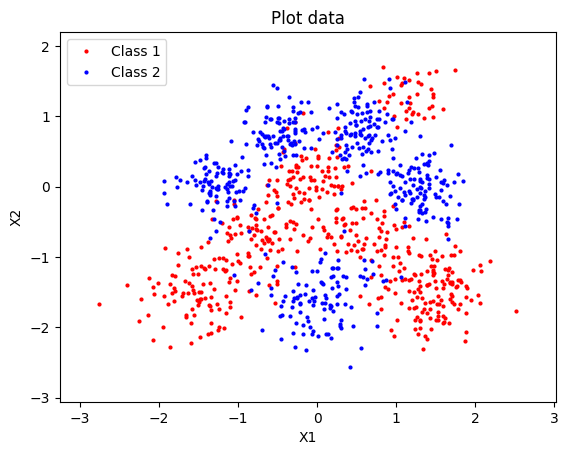

In [ ]:
plot_data(X, y)

In [ ]:
# split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]
print(np.count_nonzero(y_test))

100


In [ ]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))

##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left)
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))

##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left)
#         for which to make predictions
# y: vector of binary output labels
# w: vector of model parameters
#
# Output: The average loglikelihood
#

def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#

def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)

##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left)
# y_train: vector of training binary output labels
# X_tile_test: matrix of test input features (with a constant 1 appended to the left)
# y_test: vector of test binary output labels
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output:
#
# 1 - Vector of model parameters w
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#

def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha, print_count=0):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)

        # TODO
        # Gradient-based update rule for w. To be completed by the student
        w += alpha * ((X_tilde_train.T) @ (y_train-sigmoid_value))

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)

        if i > n_steps - print_count:
          print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [ ]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll, filename=None):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    if filename is not None:
      plt.savefig(filename+".png")
      files.download(filename+".png")
    plt.show()

In [ ]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x, filename=None):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    if filename is not None:
      plt.savefig(filename+".png")
      files.download(filename+".png")
    plt.show()

In [ ]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [ ]:
# Calculate negative log posterior for finding the MAP solution
def neg_log_post(w, X_tilde, y, prior_precision):
    sigmoid_value = predict(X_tilde, w)

    # clip sigmoid value to avoid log(0)
    epsilon = 1e-6
    sigmoid_value = np.clip(sigmoid_value, epsilon, 1 - epsilon)

    log_likelihood = np.sum(y * np.log(sigmoid_value) + (1 - y) * np.log(1.0 - sigmoid_value))
    log_prior = -0.5 * prior_precision * np.sum(w**2)   # ignoring normalizing constant as it is independent of w
    return - (log_likelihood + log_prior)

# Calculate gradient of negative log posterior for finding the MAP solution
def grad_neg_log_post(w, X_tilde, y, prior_precision):
    sigmoid_value = predict(X_tilde, w)
    grad_likelihood = (X_tilde.T) @ (y - sigmoid_value)
    grad_prior = - prior_precision * w
    return - (grad_likelihood + grad_prior)

# Find MAP solution
def find_map(X_tilde_train, y_train, sigma_0_sq):
    w_init = np.random.randn(X_tilde_train.shape[1])
    prior_precision = 1 / sigma_0_sq
    w_map, f_val, _ = scipy.optimize.fmin_l_bfgs_b(
        func = neg_log_post,
        x0 = w_init,
        fprime = grad_neg_log_post,
        args = (X_tilde_train, y_train, prior_precision)
    )
    return w_map

# Find the covariance matrix of Laplace approximation
def find_Hessian_inverse(X_tilde, w, sigma_0_sq):
    sigmoid_value = predict(X_tilde, w)
    coeff = np.multiply(sigmoid_value, (1 - sigmoid_value))
    S_N = np.identity(len(w))/sigma_0_sq + (X_tilde * coeff[:, None]).T @ X_tilde
    return np.linalg.inv(S_N)

# Predict the class of data points using Laplace approximation
def predict_Laplace(X_tilde):
    mu_a = X_tilde @ w_map
    sigma_a_sq = X_tilde.T @ (S_N @ X_tilde)
    kappa = 1 / np.sqrt(1 + np.pi * sigma_a_sq / 8)
    return logistic(kappa*mu_a)

# Apply the predict_Laplace method row-wise to X
def get_predict_laplace_vector(X):
    return np.apply_along_axis(predict_Laplace,1,X)

# Estimate log model evidence value
def estimate_log_evidence(X_tilde, y, w_map, S_N, sigma_0_sq):
    M = len(w_map)
    prior_precision = 1 / sigma_0_sq
    logdet_sign, logdet_mag = np.linalg.slogdet(np.linalg.inv(S_N))
    log_evidence = -neg_log_post(w_map, X_tilde, y, prior_precision) - 0.5 * M * np.log(sigma_0_sq) - 0.5 * logdet_mag * logdet_sign
    # 0.5 * M * np.log(2*np.pi) ignored as it is constant
    return log_evidence

# Compute average log likelihood of Laplace approximation
def compute_average_ll_Laplace(X_tilde, y, w):
    output_prob = get_predict_laplace_vector(X_tilde)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

# Plot the predictive distribution of Laplace approximation
def plot_predictive_distribution_Laplace(X, y, map_inputs = lambda x : x, filename=None):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    # X_tilde corresponds to points in the mesh grid (not data points)
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = get_predict_laplace_vector(X_tilde)   # TODO: wrong number of arguments
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)

    if filename is not None:
      plt.savefig(filename+".png")
      files.download(filename+".png")

    plt.show()

# Show the confusion matrix of the MAP solution
def display_confusion_matrix(X_tilde_test, w_map, threshold):
    prediction = predict(X_tilde_test, w_map)
    prediction = (prediction >= threshold).astype(int)
    true_positive = np.sum((prediction == 1) & (y_test == 1))
    false_positive = np.sum((prediction == 1) & (y_test == 0))
    true_negative = np.sum((prediction == 0) & (y_test == 0))
    false_negative = np.sum((prediction == 0) & (y_test == 1))

    print(true_negative/(true_negative + false_positive), false_positive/(true_negative + false_positive))
    print(false_negative/(true_positive + false_negative), true_positive/(true_positive + false_negative))

# Show the confusion matrix of Laplace approximation
def display_confusion_matrix_Laplace(X_tilde_test, threshold):
    prediction = get_predict_laplace_vector(X_tilde_test)
    prediction = (prediction >= threshold).astype(int)
    true_positive = np.sum((prediction == 1) & (y_test == 1))
    false_positive = np.sum((prediction == 1) & (y_test == 0))
    true_negative = np.sum((prediction == 0) & (y_test == 0))
    false_negative = np.sum((prediction == 0) & (y_test == 1))

    print(true_negative/(true_negative + false_positive), false_positive/(true_negative + false_positive))
    print(false_negative/(true_positive + false_negative), true_positive/(true_positive + false_negative))

In [ ]:
l = 0.1
sigma_0_sq = 1

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

w_map = find_map(X_tilde_train, y_train, sigma_0_sq)
# print(w_map)

map:  -0.2201397138426304 -0.29700603215739496


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

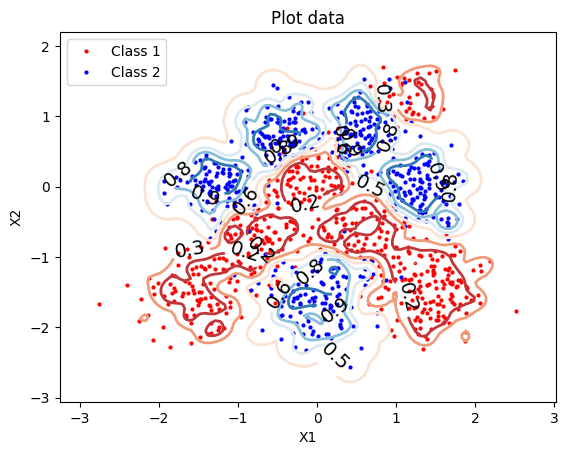

0.94 0.06
0.1 0.9


In [ ]:
# MAP
ll_train_map = compute_average_ll(X_tilde_train, y_train, w_map)
ll_test_map = compute_average_ll(X_tilde_test, y_test, w_map)
print("map: ", ll_train_map, ll_test_map)

filename = "contour_map_l_" + str(l) + "_sig_" + str(sigma_0_sq)
plot_predictive_distribution(X, y, w_map, lambda x : evaluate_basis_functions(l, x, X_train), filename=filename)

display_confusion_matrix(X_tilde_test, w_map, 0.5)

Laplace:  -0.25942239885533075 -0.3217483937738917


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

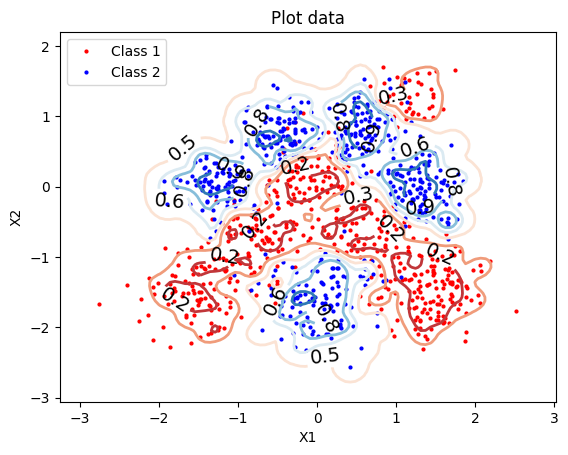

0.94 0.06
0.1 0.9


In [ ]:
# Laplace
S_N = find_Hessian_inverse(X_tilde_train, w_map, sigma_0_sq)

ll_train_Laplace = compute_average_ll_Laplace(X_tilde_train, y_train, w_map)
ll_test_Laplace = compute_average_ll_Laplace(X_tilde_test, y_test, w_map)
print("Laplace: ", ll_train_Laplace, ll_test_Laplace)

filename = "contour_laplace_l_" + str(l) + "_sig_" + str(sigma_0_sq)
plot_predictive_distribution_Laplace(X, y, lambda x : evaluate_basis_functions(l, x, X_train), filename=filename)

display_confusion_matrix_Laplace(X_tilde_test, 0.5)

In [ ]:
print(estimate_log_evidence(X_tilde_train, y_train, w_map, S_N, sigma_0_sq))

-321.2202697148689


In [ ]:
import seaborn as sns

heatmap_values = np.empty((10, 10))

sigma_0_sq_values = np.logspace(np.log10(0.5), np.log10(1.5), 10)
l_values = np.logspace(np.log10(0.08), np.log10(1), 10)

# sigma_0_sq_values = np.linspace(0.5, 0.9, 10)
# l_values = np.linspace(0.5, 0.6, 10)

for j, l in enumerate(l_values):
    X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
    print("progress: ", j, "/10")
    for i, sigma_0_sq in enumerate(sigma_0_sq_values):
      w_map = find_map(X_tilde_train, y_train, sigma_0_sq)
      S_N = find_Hessian_inverse(X_tilde_train, w_map, sigma_0_sq)
      heatmap_values[i][j] = estimate_log_evidence(X_tilde_train, y_train, w_map, S_N, sigma_0_sq)

progress:  0 /10
progress:  1 /10
progress:  2 /10
progress:  3 /10
progress:  4 /10
progress:  5 /10
progress:  6 /10
progress:  7 /10
progress:  8 /10
progress:  9 /10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

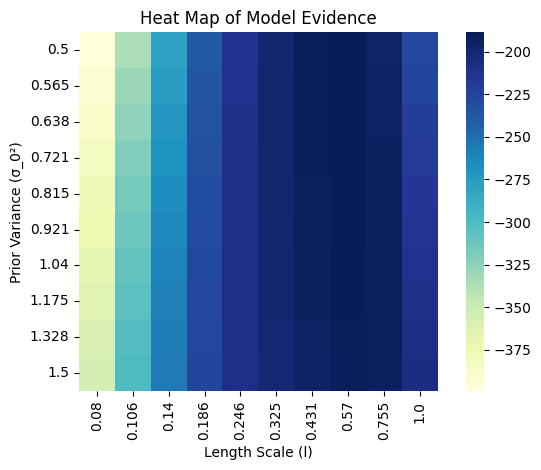

In [ ]:
sns.heatmap(heatmap_values, xticklabels=np.round(l_values, 3), yticklabels=np.round(sigma_0_sq_values, 3), cmap="YlGnBu", square=True)

plt.ylabel("Prior Variance (σ_0²)")
plt.xlabel("Length Scale (l)")
plt.title("Heat Map of Model Evidence")
plt.tight_layout()

filename = "heatmap_first"
plt.savefig(filename+".png")
files.download(filename+".png")

plt.show()

In [ ]:
# optimal hyperparameter values
l = 0.556
sigma_0_sq = 0.722

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

w_map = find_map(X_tilde_train, y_train, sigma_0_sq)
# print(w_map)

map:  -0.18243969245990665 -0.20705052940369234


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

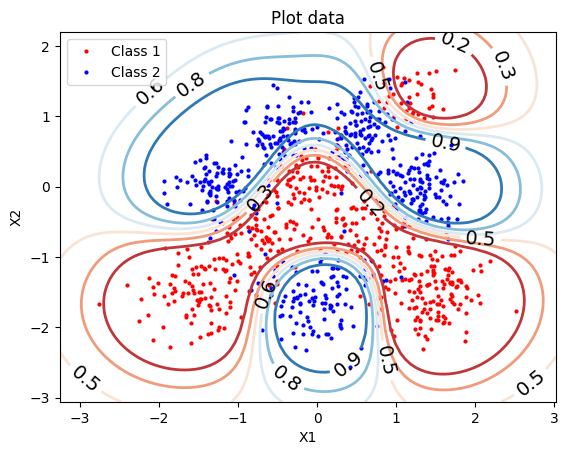

0.93 0.07
0.07 0.93


In [ ]:
# MAP
ll_train_map = compute_average_ll(X_tilde_train, y_train, w_map)
ll_test_map = compute_average_ll(X_tilde_test, y_test, w_map)
print("map: ", ll_train_map, ll_test_map)

filename = "contour_map_l_" + str(l) + "_sig_" + str(sigma_0_sq)
plot_predictive_distribution(X, y, w_map, lambda x : evaluate_basis_functions(l, x, X_train), filename=filename)

display_confusion_matrix(X_tilde_test, w_map, 0.5)

Laplace:  -0.18931186615876372 -0.20945296279585623


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

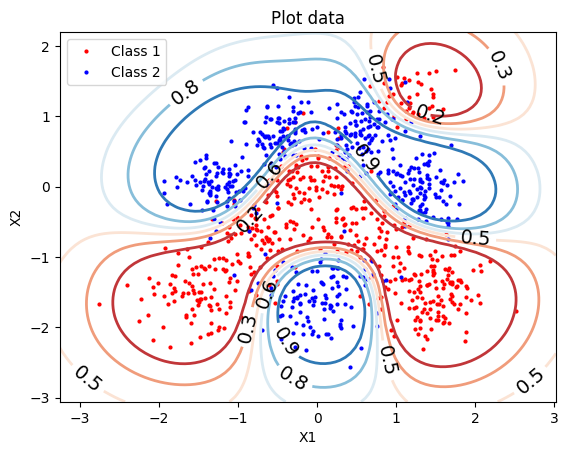

0.93 0.07
0.07 0.93


In [ ]:
# Laplace
S_N = find_Hessian_inverse(X_tilde_train, w_map, sigma_0_sq)

ll_train_Laplace = compute_average_ll_Laplace(X_tilde_train, y_train, w_map)
ll_test_Laplace = compute_average_ll_Laplace(X_tilde_test, y_test, w_map)
print("Laplace: ", ll_train_Laplace, ll_test_Laplace)

filename = "contour_laplace_l_" + str(l) + "_sig_" + str(sigma_0_sq)
plot_predictive_distribution_Laplace(X, y, lambda x : evaluate_basis_functions(l, x, X_train), filename=filename)

display_confusion_matrix_Laplace(X_tilde_test, 0.5)